In [2]:
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
print(torchtext.__version__)


0.9.0


In [3]:
# create Field objects
SESSION_ID = data.Field()
TIMESTAMP = data.Field()
USER_ID = data.Field()
PRODUCT_ID = data.Field()
EVENT_TYPE = data.Field()
OFFERED_DISCOUNT = data.Field()
PURCHASE_ID = data.Field()

# create a dictionary representing the dataset
fields = {
  'session_id': ('session_id', SESSION_ID),
  'timestamp': ('timestamp', TIMESTAMP),
  'user_id': ('user_id', USER_ID),
  'product_id': ('product_id', PRODUCT_ID),
  'event_type': ('event_type', EVENT_TYPE),
  'offered_discount': ('offered_discount', OFFERED_DISCOUNT),
  'purchase_id': ('purchase_id', PURCHASE_ID)
}

# load the dataset in json format
train_ds, valid_ds, test_ds = data.TabularDataset.splits(
  path = 'data2',
  train = 'sessions.jsonl',
  validation = 'sessions.jsonl',
  test = 'sessions.jsonl',
  format = 'json',
  fields = fields
)




In [4]:
# check an example
print(vars(train_ds[0]))
print(vars(train_ds[2]))

{'session_id': 100001, 'timestamp': ['2021-02-03T07:28:50'], 'user_id': 102, 'product_id': 1283, 'event_type': ['VIEW_PRODUCT'], 'offered_discount': 0, 'purchase_id': None}
{'session_id': 100002, 'timestamp': ['2021-02-22T03:57:09'], 'user_id': 102, 'product_id': 1277, 'event_type': ['VIEW_PRODUCT'], 'offered_discount': 5, 'purchase_id': None}


In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
data = pd.read_json(os.path.abspath('') + "/data2/sessions.jsonl", lines=True)
data = data[['session_id','timestamp','user_id','product_id','event_type','offered_discount','purchase_id']]

cleanup = {"event_type":{"BUY_PRODUCT":1, "VIEW_PRODUCT":-1}}
data = data.replace(cleanup)
#data = data.fillna(0)

In [6]:
data[0:100]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-02-03 07:28:50,102.0,1283.0,-1,0,NaN
1,100002,2021-02-22 03:56:50,102.0,NaN,-1,5,NaN
2,100002,2021-02-22 03:57:09,102.0,1277.0,-1,5,NaN
3,100003,2021-02-15 07:55:33,102.0,1040.0,-1,0,NaN
4,100003,2021-02-15 07:57:14,102.0,1041.0,-1,0,NaN
...,...,...,...,...,...,...,...
95,100020,2021-03-25 21:45:19,102.0,1001.0,1,15,20005.0
96,100021,2021-03-20 01:11:57,NaN,1283.0,-1,0,NaN
97,100022,2021-03-26 02:18:22,102.0,1002.0,-1,0,NaN
98,100022,2021-03-26 02:22:08,102.0,1003.0,-1,0,NaN


<AxesSubplot:>

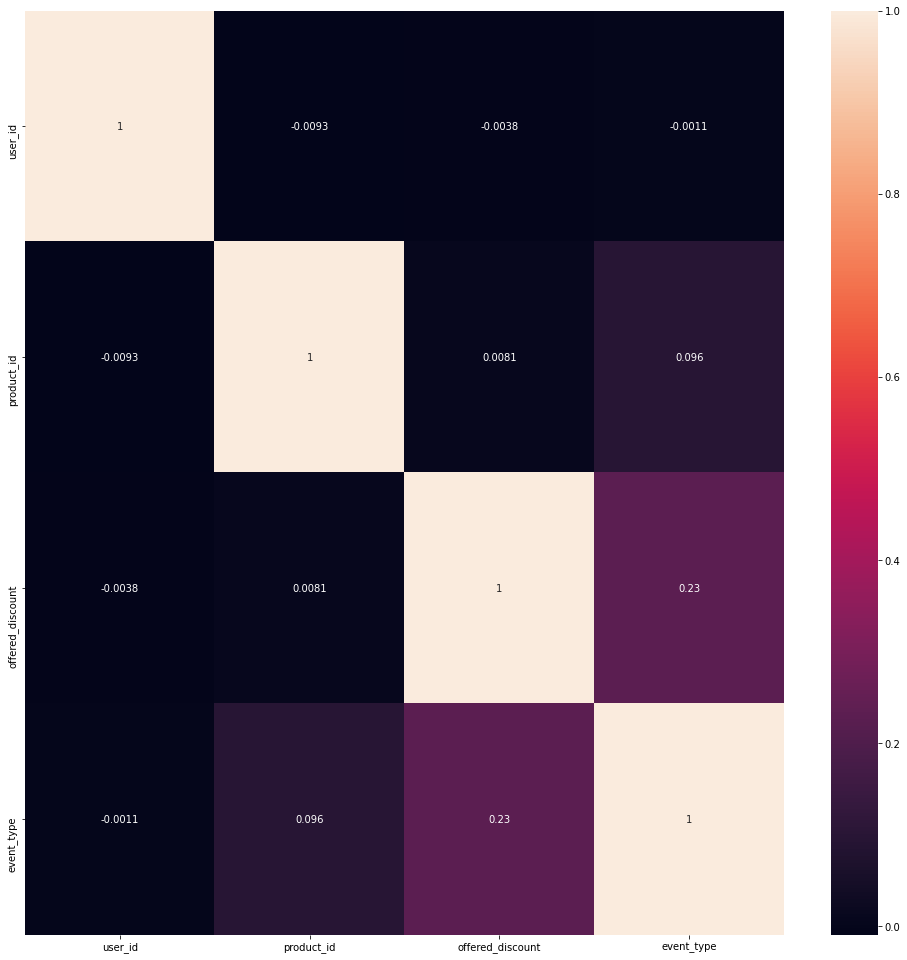

In [7]:

plt.figure(figsize=(17,17))
valuable_data = ['timestamp','user_id', 'product_id', 'offered_discount', 'event_type' ]
sns.heatmap(data[valuable_data].corr(),annot = True)

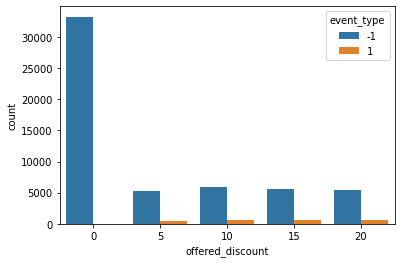

In [8]:

g = sns.countplot(x="offered_discount",hue="event_type",data=data)

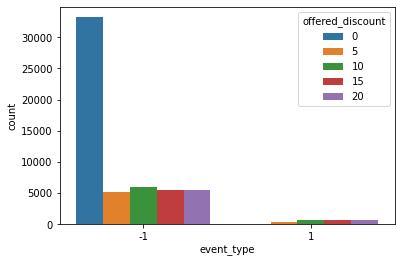

In [9]:
g2 = sns.countplot(x="event_type",hue="offered_discount",data=data)

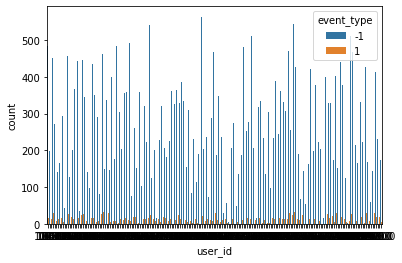

In [10]:
g3 = sns.countplot(x='user_id',hue='event_type',data=data)

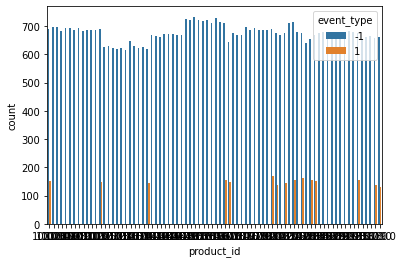

In [11]:
g4 = sns.countplot(x='product_id',hue='event_type',data=data)

In [12]:
d1 = data[data.event_type == 1].groupby(['offered_discount']).count()['event_type']
d1

offered_discount
5     389
10    629
15    693
20    655
Name: event_type, dtype: int64

In [13]:
d2 = data.groupby(['offered_discount']).count()['event_type']
d2

offered_discount
0     33202
5      5650
10     6603
15     6252
20     6160
Name: event_type, dtype: int64

In [14]:
d3 = d1/d2
d3

offered_discount
0          NaN
5     0.068850
10    0.095260
15    0.110845
20    0.106331
Name: event_type, dtype: float64

<AxesSubplot:title={'center':'buy to all'}, xlabel='offered_discount'>

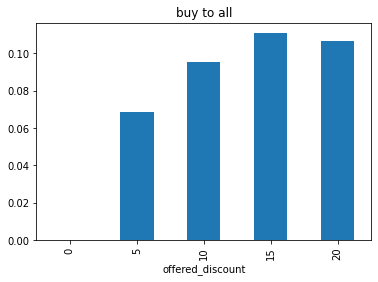

In [15]:
d3.plot(kind='bar',title='buy to all')

In [16]:
d4 = data[data.event_type == 1]
d4.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
24,100006,2021-03-16 13:39:32,102.0,1318.0,1,15,20001.0
48,100010,2021-02-21 00:01:22,102.0,1293.0,1,20,20002.0
69,100015,2021-02-05 19:34:13,102.0,1319.0,1,20,20003.0
93,100019,2021-02-10 12:40:54,102.0,1281.0,1,20,20004.0
95,100020,2021-03-25 21:45:19,102.0,1001.0,1,15,20005.0


<AxesSubplot:xlabel='product_id', ylabel='count'>

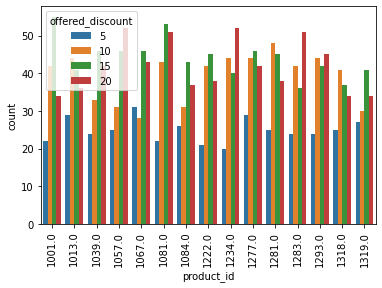

In [17]:
g_prod_disc = sns.countplot(x='product_id',hue='offered_discount',data=d4)
g_prod_disc.set_xticklabels(g_prod_disc.get_xticklabels(), rotation=90)
g_prod_disc

In [18]:

d7 = data[data.product_id.isin(d4.product_id)][valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])
d7

,timestamp,user_id,product_id,offered_discount,event_type
174,2021-03-05 05:26:32,102.0,1001.0,0,-1
94,2021-03-25 21:44:47,102.0,1001.0,15,-1
95,2021-03-25 21:45:19,102.0,1001.0,15,1
184,2021-01-01 08:19:12,102.0,1013.0,0,-1
204,2021-03-14 03:27:32,102.0,1013.0,0,-1
...,...,...,...,...,...
57691,2021-03-07 10:14:59,301.0,1293.0,0,-1
57835,2021-02-08 22:20:27,301.0,1318.0,0,-1
57789,2021-01-04 00:39:26,301.0,1319.0,10,-1
57744,2021-03-01 19:54:21,301.0,1319.0,15,-1


czas od ostatniego zakupu/pierwszego spojrzenia, ilość wejść w tym czasie, maksymalna zaoferowana zniżka, obecna zniżka, czy kupił

niezdecydowany: patrzył i nie kupił, dostał zniżkę i nie kupił
zdecydowany: dostał zniżkę nie kupił ale i tak kupił później, kupił od razu

In [19]:
dd7 = d7.groupby(["user_id", "product_id"]).get_group((102,1067))
dd7.timestamp = dd7['timestamp'].diff()
dd7

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,user_id,product_id,offered_discount,event_type
334,NaT,102.0,1067.0,0,-1
330,37 days 10:41:36,102.0,1067.0,0,-1
332,9 days 05:03:04,102.0,1067.0,0,-1
469,4 days 22:51:05,102.0,1067.0,5,-1
508,12 days 10:31:02,102.0,1067.0,0,-1
318,17 days 16:24:14,102.0,1067.0,15,-1


# Patera

In [20]:
import numpy as np
clean_data = data
for i, d in clean_data.iterrows():
    if d.isnull().product_id and d.event_type == 1:
        clean_data.at[i,'product_id'] = clean_data.at[i-1,'product_id']
    if d.isnull().user_id:
        clean_data.at[i,'user_id'] = data[data.session_id == d.session_id]['user_id'].dropna().mean()
clean_data = clean_data[valuable_data]


In [21]:
clean_data

,timestamp,user_id,product_id,offered_discount,event_type
0,2021-02-03 07:28:50,102.0,1283.0,0,-1
1,2021-02-22 03:56:50,102.0,NaN,5,-1
2,2021-02-22 03:57:09,102.0,1277.0,5,-1
3,2021-02-15 07:55:33,102.0,1040.0,0,-1
4,2021-02-15 07:57:14,102.0,1041.0,0,-1
...,...,...,...,...,...
57862,2021-03-24 04:43:30,301.0,1034.0,0,-1
57863,2021-03-24 04:46:08,301.0,1036.0,0,-1
57864,2021-03-24 04:49:34,301.0,1037.0,0,-1
57865,2021-03-24 04:51:50,301.0,1038.0,0,-1


In [22]:
sorted_data = clean_data[valuable_data].dropna().sort_values(by = ['user_id','product_id','timestamp'])

In [23]:
dic = [x for _, x in sorted_data.groupby(["user_id", "product_id"])] 


In [24]:
split_dic = []
for d in dic:
    last = 0
    for i in range(len(d)):
        if d.iloc[i].event_type == 1:
            split_dic.append(d[last:i+1])
            last = i+1
    if last < len(d):
        split_dic.append(d[last:len(d)])

In [25]:
for d in split_dic:
    t1 = d['timestamp'].diff()
    d.timestamp = t1

/home/tisek/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
split_dic[3]

,timestamp,user_id,product_id,offered_discount,event_type
175,NaT,102.0,1004.0,0,-1
195,71 days 19:03:46,102.0,1004.0,0,-1
261,4 days 14:44:36,102.0,1004.0,0,-1
435,2 days 19:29:48,102.0,1004.0,15,-1


In [27]:
final_data = []
for d in split_dic:
    n_visits = len(d)
    d_time = d.sum().timestamp.total_seconds()
    #max_disc = d.tail(2).iloc[0].offered_discount.item()
    max_disc = d.max().offered_discount
    curr_disc = d.tail(1).offered_discount.item()
    is_purchased = d.tail(1).event_type.item()
    final_data.append([d_time,n_visits,max_disc,curr_disc,is_purchased]) 

In [28]:
df = pd.DataFrame(final_data,columns=["d_time","n_visits","max_disc","curr_disc","is_purchased"])
df

,d_time,n_visits,max_disc,curr_disc,is_purchased
0,1786727.0,3,15,15,1
1,6085240.0,5,10,0,-1
2,6085181.0,5,10,0,-1
3,6844690.0,4,15,15,-1
4,6844813.0,4,15,15,-1
...,...,...,...,...,...
15376,4907844.0,2,15,15,-1
15377,4907795.0,2,15,15,-1
15378,4907724.0,2,15,15,-1
15379,0.0,1,0,0,-1


In [29]:
df = df[df.n_visits > 1]

In [30]:
df.to_json(r'data2/final.json',orient="records",lines=True)

<AxesSubplot:>

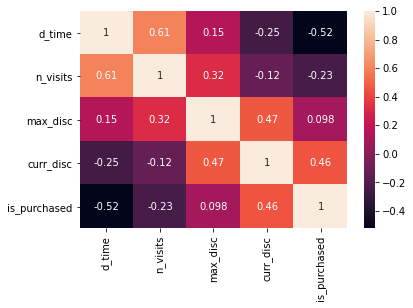

In [31]:
sns.heatmap(df.corr(),annot = True)

In [32]:
visits_per_minute = df.n_visits / df.d_time * 60
df2 = df.copy(True)
df2.insert(2,"visits_per_minute",visits_per_minute,True) 

In [33]:
df2

,d_time,n_visits,visits_per_minute,max_disc,curr_disc,is_purchased
0,1786727.0,3,0.000101,15,15,1
1,6085240.0,5,0.000049,10,0,-1
2,6085181.0,5,0.000049,10,0,-1
3,6844690.0,4,0.000035,15,15,-1
4,6844813.0,4,0.000035,15,15,-1
...,...,...,...,...,...,...
15375,665824.0,2,0.000180,0,0,-1
15376,4907844.0,2,0.000024,15,15,-1
15377,4907795.0,2,0.000024,15,15,-1
15378,4907724.0,2,0.000024,15,15,-1


In [34]:
df2[(df2.visits_per_minute > .1) & (df2.is_purchased != 1)]

,d_time,n_visits,visits_per_minute,max_disc,curr_disc,is_purchased
6031,759.0,2,0.158103,0,0,-1
6054,914.0,2,0.131291,0,0,-1


<AxesSubplot:>

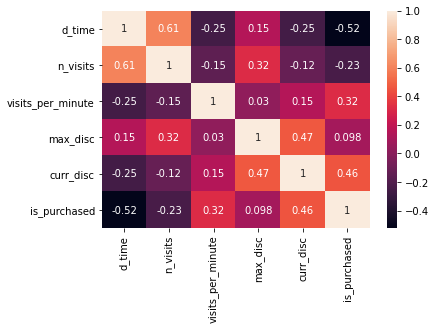

In [35]:
df2.to_json(r'data2/final_vpm.json',orient="records",lines=True)
sns.heatmap(df2.corr(),annot = True)

In [36]:
normal_t = df['d_time']
normalized_df = df.copy(True)
normalized_df.d_time = (normal_t-normal_t.min())/(normal_t.max()-normal_t.min())
df2.d_time = normalized_df.d_time

In [45]:
df2.to_json(r'data2/normal_vpm.json',orient="records",lines=True)
normalized_df.to_json(r'data2/normal_final.json',orient="records",lines=True)

<AxesSubplot:>

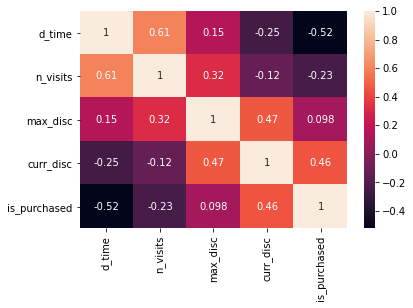

In [38]:
sns.heatmap(normalized_df.corr(),annot = True)

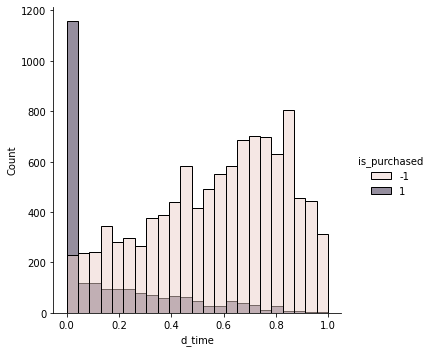

In [39]:
g_n1 = sns.displot(data = normalized_df,x='d_time',hue="is_purchased")

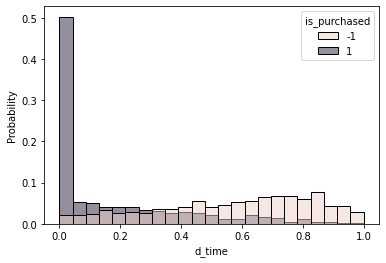

In [40]:
g_n2 = sns.histplot(data = normalized_df,x='d_time',hue="is_purchased",stat="probability",common_norm=False)

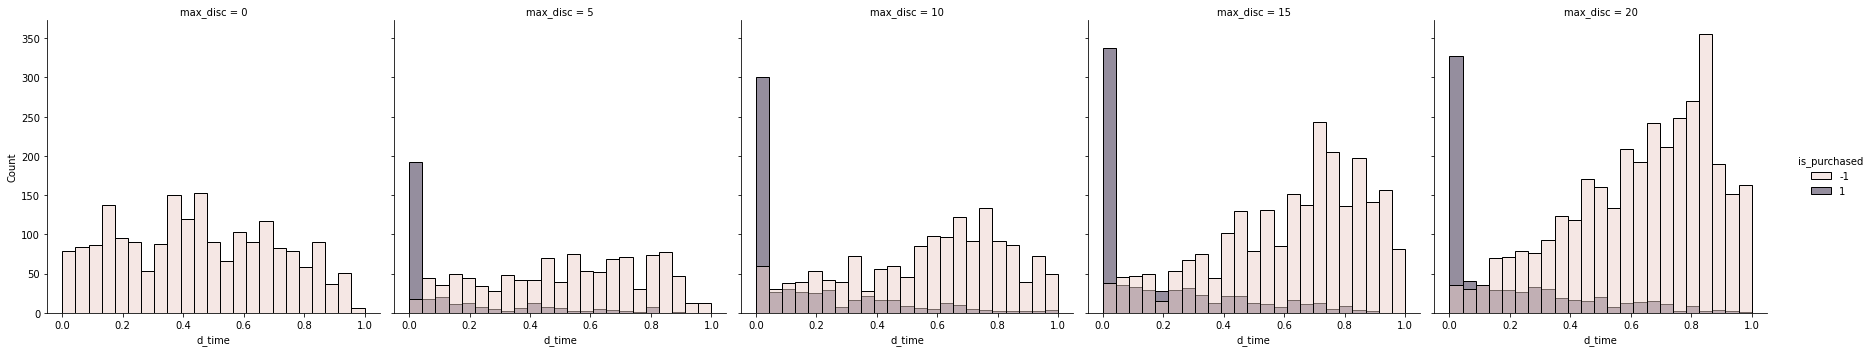

In [41]:
g_n3 = sns.displot(data = normalized_df,x='d_time',col="max_disc",hue="is_purchased")

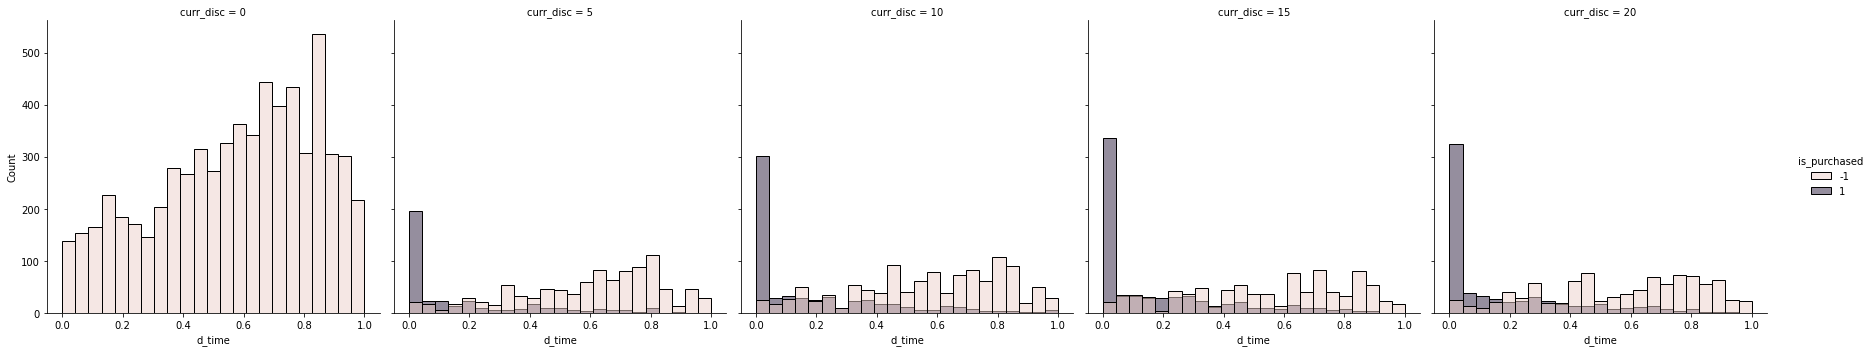

In [42]:
g_n4 = sns.displot(data = normalized_df,x='d_time',col="curr_disc",hue="is_purchased")

In [43]:
df = pd.DataFrame(final_data,columns=["d_time","n_visits","max_disc","curr_disc","is_purchased"])
df = df[df.n_visits > 1]
len(df[(df.is_purchased == 1) & (df.curr_disc != 0) & (df.d_time > 3600) & (df.n_visits < 4) ])

636

In [46]:
df2[df2.is_purchased == 1]

,d_time,n_visits,visits_per_minute,max_disc,curr_disc,is_purchased
0,0.231756,3,0.000101,15,15,1
41,0.118486,4,0.000263,15,15,1
52,0.098124,2,0.000159,10,10,1
54,0.137693,4,0.000226,15,15,1
57,0.000002,2,6.000000,20,20,1
...,...,...,...,...,...,...
15353,0.297546,4,0.000105,15,15,1
15355,0.000019,2,0.779221,15,15,1
15358,0.000003,2,4.137931,10,10,1
15374,0.000001,2,8.000000,15,15,1
